In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import torch
from torch import nn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Sat Oct  4 13:18:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

### Importing K2 exoplanets and candidates data

-Note: some formatting issues in the file were fixed

### Importing the new df

In [ ]:
df_k2=pd.read_csv("K2Dataset_zaatari.csv", comment='#', sep=',', skip_blank_lines=True)
df_k2_test=pd.read_csv("k2_planets_candidates_formatted.csv", comment='#', sep=',', skip_blank_lines=True)
df_k2.head(10)

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-02-15,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2016-07-28,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-04-26,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,EPIC 201126503.01,EPIC 201126503,NaN,NaN,EPIC 201126503,EPIC 201126503.01,NaN,NaN,TIC 380166702,...,2015-12-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,EPIC 201127519.01,EPIC 201127519,NaN,NaN,EPIC 201127519,EPIC 201127519.01,NaN,NaN,TIC 96244568,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,EPIC 201127519.01,EPIC 201127519,NaN,NaN,EPIC 201127519,EPIC 201127519.01,NaN,NaN,TIC 96244568,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,EPIC 201147085.01,EPIC 201147085,NaN,NaN,EPIC 201147085,EPIC 201147085.01,NaN,NaN,TIC 49427200,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,EPIC 201152065.01,EPIC 201152065,NaN,NaN,EPIC 201152065,EPIC 201152065.01,NaN,NaN,TIC 173145687,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_k2.shape[1]


295

In [ ]:
df_k2_test.shape[1]

94

In [ ]:
### Getting tess and kepler and formatting them


# df_tess= pd.read_csv("Tess_data.csv",
#     comment="#",
#     encoding="utf-8-sig",
#     skip_blank_lines=True,
#     index_col=None)

df_kepler= pd.read_csv("Kepler_data.csv",
    comment="#",
    encoding="utf-8-sig",
    skip_blank_lines=True,
    index_col=None)

In [ ]:
df_kepler.head(30)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


### Task 1.  Clean the  data and process the missing values

####  K2 Data

In [ ]:
df_k2.head(20)

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-02-15,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2016-07-28,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-04-26,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,EPIC 201126503.01,EPIC 201126503,NaN,NaN,EPIC 201126503,EPIC 201126503.01,NaN,NaN,TIC 380166702,...,2015-12-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,EPIC 201127519.01,EPIC 201127519,NaN,NaN,EPIC 201127519,EPIC 201127519.01,NaN,NaN,TIC 96244568,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,EPIC 201127519.01,EPIC 201127519,NaN,NaN,EPIC 201127519,EPIC 201127519.01,NaN,NaN,TIC 96244568,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,EPIC 201147085.01,EPIC 201147085,NaN,NaN,EPIC 201147085,EPIC 201147085.01,NaN,NaN,TIC 49427200,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,EPIC 201152065.01,EPIC 201152065,NaN,NaN,EPIC 201152065,EPIC 201152065.01,NaN,NaN,TIC 173145687,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Drop columns with >75% missing values
df_cleaned = df_k2.dropna(axis=1, thresh=0.75 * len(df_k2))
df_cleaned_test = df_k2_test.dropna(axis=1, thresh=0.75 * len(df_k2_test))

In [ ]:
df_cleaned_test.shape[1]

47

In [ ]:
df_cleaned.shape[1]

124

In [ ]:
# Impute missing numeric values (using median)
numeric_cols = df_cleaned.select_dtypes(include=['float64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

/tmp/ipython-input-3112749429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())


In [ ]:
# Impute missing categorical values (using mode)
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

/tmp/ipython-input-920299363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])


In [ ]:
# Check remaining nulls
print(df_cleaned.isnull().sum())

rowid            0
pl_name          0
hostname         0
epic_hostname    0
epic_candname    0
                ..
st_nrvc          0
st_nspec         0
pl_nespec        0
pl_ntranspec     0
pl_ndispec       0
Length: 124, dtype: int64


In [ ]:
df_cleaned.head(10)

,rowid,pl_name,hostname,epic_hostname,epic_candname,tic_id,gaia_id,default_flag,disposition,disp_refname,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,EPIC 210848071,EPIC 210848071.01,TIC 26123781,Gaia DR2 58200934326315136,0,CONFIRMED,Espinoza et al. 2016,...,2018-02-15,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,BD+20 594 b,BD+20 594,EPIC 210848071,EPIC 210848071.01,TIC 26123781,Gaia DR2 58200934326315136,0,CONFIRMED,Espinoza et al. 2016,...,2016-07-28,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,BD+20 594 b,BD+20 594,EPIC 210848071,EPIC 210848071.01,TIC 26123781,Gaia DR2 58200934326315136,1,CONFIRMED,Espinoza et al. 2016,...,2018-04-26,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,EPIC 201111557.01,EPIC 201111557,EPIC 201111557,EPIC 201111557.01,TIC 176942156,Gaia DR2 3596276829630866432,1,CANDIDATE,Livingston et al. 2018,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,EPIC 201111557.01,EPIC 201111557,EPIC 201111557,EPIC 201111557.01,TIC 176942156,Gaia DR2 3596276829630866432,0,CANDIDATE,Livingston et al. 2018,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,EPIC 201126503.01,EPIC 201126503,EPIC 201126503,EPIC 201126503.01,TIC 380166702,Gaia DR2 3598754063687508480,1,CANDIDATE,Vanderburg et al. 2016,...,2015-12-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,EPIC 201127519.01,EPIC 201127519,EPIC 201127519,EPIC 201127519.01,TIC 96244568,Gaia DR2 3597255188821238016,0,CANDIDATE,Livingston et al. 2018,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,EPIC 201127519.01,EPIC 201127519,EPIC 201127519,EPIC 201127519.01,TIC 96244568,Gaia DR2 3597255188821238016,1,CANDIDATE,Livingston et al. 2018,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,EPIC 201147085.01,EPIC 201147085,EPIC 201147085,EPIC 201147085.01,TIC 49427200,Gaia DR2 2613413008919918976,1,CANDIDATE,Kruse et al. 2019,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,EPIC 201152065.01,EPIC 201152065,EPIC 201152065,EPIC 201152065.01,TIC 173145687,Gaia DR2 3785946674230162560,1,CANDIDATE,Kruse et al. 2019,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check the class distribution
class_distribution = df_cleaned['disposition'].value_counts(normalize=True)
print("Class distribution:\n", class_distribution)

Class distribution:
 disposition
CONFIRMED         0.578172
CANDIDATE         0.343157
FALSE POSITIVE    0.073177
REFUTED           0.005495
Name: proportion, dtype: float64


In [ ]:
# Imbalance is detected, use SMOTE
from imblearn.over_sampling import SMOTE
X = df_cleaned.drop(columns=['disposition'])
y = df_cleaned['disposition']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train.select_dtypes(include=np.number), y_train)

In [ ]:
# Check resampled class distribution
resampled_class_distribution = pd.Series(y_res).value_counts(normalize=True)
print("Resampled class distribution:\n", resampled_class_distribution)

Resampled class distribution:
 disposition
CANDIDATE         0.25
CONFIRMED         0.25
FALSE POSITIVE    0.25
REFUTED           0.25
Name: proportion, dtype: float64


In [ ]:
# Check the transformed dataset
df_cleaned.head(10)

,rowid,pl_name,hostname,epic_hostname,epic_candname,tic_id,gaia_id,default_flag,disposition,disp_refname,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,EPIC 210848071,EPIC 210848071.01,TIC 26123781,Gaia DR2 58200934326315136,0,CONFIRMED,Espinoza et al. 2016,...,2018-02-15,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,BD+20 594 b,BD+20 594,EPIC 210848071,EPIC 210848071.01,TIC 26123781,Gaia DR2 58200934326315136,0,CONFIRMED,Espinoza et al. 2016,...,2016-07-28,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,BD+20 594 b,BD+20 594,EPIC 210848071,EPIC 210848071.01,TIC 26123781,Gaia DR2 58200934326315136,1,CONFIRMED,Espinoza et al. 2016,...,2018-04-26,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,EPIC 201111557.01,EPIC 201111557,EPIC 201111557,EPIC 201111557.01,TIC 176942156,Gaia DR2 3596276829630866432,1,CANDIDATE,Livingston et al. 2018,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,EPIC 201111557.01,EPIC 201111557,EPIC 201111557,EPIC 201111557.01,TIC 176942156,Gaia DR2 3596276829630866432,0,CANDIDATE,Livingston et al. 2018,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,EPIC 201126503.01,EPIC 201126503,EPIC 201126503,EPIC 201126503.01,TIC 380166702,Gaia DR2 3598754063687508480,1,CANDIDATE,Vanderburg et al. 2016,...,2015-12-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,EPIC 201127519.01,EPIC 201127519,EPIC 201127519,EPIC 201127519.01,TIC 96244568,Gaia DR2 3597255188821238016,0,CANDIDATE,Livingston et al. 2018,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,EPIC 201127519.01,EPIC 201127519,EPIC 201127519,EPIC 201127519.01,TIC 96244568,Gaia DR2 3597255188821238016,1,CANDIDATE,Livingston et al. 2018,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,EPIC 201147085.01,EPIC 201147085,EPIC 201147085,EPIC 201147085.01,TIC 49427200,Gaia DR2 2613413008919918976,1,CANDIDATE,Kruse et al. 2019,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,EPIC 201152065.01,EPIC 201152065,EPIC 201152065,EPIC 201152065.01,TIC 173145687,Gaia DR2 3785946674230162560,1,CANDIDATE,Kruse et al. 2019,...,2019-09-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Using Random Forest for multi-class classification
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_res, y_res)  # Train on the resampled data (oversampling was applied)

RandomForestClassifier(random_state=42)

In [ ]:
# Train the model on the resampled training data (X_res, y_res)
rf_model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set (original test data)
y_pred = rf_model.predict(X_test.select_dtypes(include=np.number))

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.97      0.96      0.97       275
     CONFIRMED       0.99      0.99      0.99       463
FALSE POSITIVE       0.87      0.90      0.88        59
       REFUTED       1.00      0.75      0.86         4

      accuracy                           0.98       801
     macro avg       0.96      0.90      0.92       801
  weighted avg       0.98      0.98      0.98       801



In [ ]:
df_cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4004 non-null   object 
 1   hostname         4004 non-null   object 
 2   default_flag     4004 non-null   int64  
 3   disposition      4004 non-null   object 
 4   disp_refname     4004 non-null   object 
 5   sy_snum          3987 non-null   float64
 6   sy_pnum          3987 non-null   float64
 7   discoverymethod  3987 non-null   object 
 8   disc_year        3987 non-null   float64
 9   disc_facility    3987 non-null   object 
 10  soltype          3987 non-null   object 
 11  pl_controv_flag  3987 non-null   float64
 12  pl_refname       3987 non-null   object 
 13  pl_orbper        3937 non-null   float64
 14  pl_orbpererr1    3052 non-null   float64
 15  pl_orbpererr2    3052 non-null   float64
 16  pl_orbperlim     3937 non-null   float64
 17  pl_rade       

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Columns: 124 entries, rowid to pl_ndispec
dtypes: float64(96), int64(2), object(26)
memory usage: 3.8+ MB


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[265   2   8   0]
 [  3 460   0   0]
 [  6   0  53   0]
 [  0   1   0   3]]


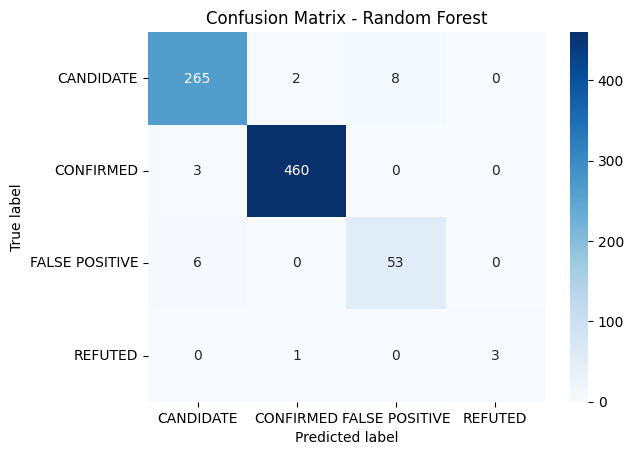

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Kepler data

In [ ]:
df_kepler.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [ ]:
df_kepler=df_kepler.drop(["koi_teq_err1","koi_teq_err2"],axis=1)

In [ ]:
df_kepler=df_kepler.drop("kepler_name",axis=1)

In [ ]:
# Find columns with all null values
null_columns = df_kepler.columns[df_kepler.isnull().all()]

# Drop the identified columns
df_kepler = df_kepler.drop(columns=null_columns)

print(f"Dropped columns: {list(null_columns)}")
display(df_kepler.head())

Dropped columns: []


,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Task
Clean the `df_kepler` DataFrame by dropping columns with more than 80% missing values, imputing missing values in scientifically important columns, and removing duplicate rows.

## Analyze missing values

### Subtask:
Calculate the percentage of missing values for each column in `df_kepler`.


**Reasoning**:
Calculate and display the percentage of missing values for each column in `df_kepler`.



In [ ]:
missing_values = df_kepler.isnull().sum()
total_rows = df_kepler.shape[0]
percentage_missing = (missing_values / total_rows) * 100
display(percentage_missing)

,0
kepid,0.000000
kepoi_name,0.000000
koi_disposition,0.000000
koi_pdisposition,0.000000
koi_score,15.788373
koi_fpflag_nt,0.000000
koi_fpflag_ss,0.000000
koi_fpflag_co,0.000000
koi_fpflag_ec,0.000000
koi_period,0.000000
